In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import  train_test_split, GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('vehicles_data_students.csv')

In [3]:
df.head()

,Unnamed: 0,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long
0,55483,7315914053,0,2018.0,ram,promaster 2500,excellent,NaN,gas,44244.0,clean,automatic,NaN,NaN,van,NaN,NaN,ca,32.792800,-116.966500
1,162368,7310885048,13995,2017.0,mazda,cx-3,NaN,4 cylinders,gas,7037.0,rebuilt,automatic,NaN,NaN,SUV,white,NaN,ia,41.207382,-96.023096
2,234393,7308243856,19990,2019.0,mitsubishi,eclipse cross sp,good,NaN,gas,35313.0,clean,other,4wd,NaN,hatchback,white,NaN,nc,35.190000,-80.830000
3,276110,7315817729,0,2019.0,honda,cr-v,NaN,NaN,gas,25626.0,clean,automatic,NaN,NaN,SUV,orange,NaN,ny,40.854573,-74.120219
4,349033,7301620999,42900,2015.0,chevrolet,corvette,excellent,8 cylinders,gas,29000.0,clean,automatic,NaN,NaN,convertible,black,NaN,sc,34.755562,-82.906419


In [4]:
drop_columns=['Unnamed: 0','id','title_status','size','lat','long','county']
df=df.drop(columns=drop_columns,axis=1)

In [5]:
!pip install xgboost

In [6]:
df.shape

(64032, 13)

In [7]:
import xgboost as xgb

In [8]:
df.isnull().sum()

price               0
year              158
manufacturer     2569
model             802
condition       26097
cylinders       26511
fuel              424
odometer          669
transmission      353
drive           19471
type            13785
paint_color     19505
state               0
dtype: int64

In [9]:
df=df.dropna()
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,automatic,rwd,sedan,white,fl
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,automatic,4wd,truck,blue,wi
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,automatic,4wd,SUV,grey,ak
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,automatic,rwd,SUV,white,fl
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,other,4wd,pickup,red,ma


In [10]:
df.shape

(17491, 13)

In [11]:
df.describe()

,price,year,odometer
count,1.749100e+04,17491.000000,1.749100e+04
mean,1.632545e+04,2009.535247,1.122616e+05
std,1.294429e+05,9.596493,2.155149e+05
min,0.000000e+00,1918.000000,0.000000e+00
25%,5.600000e+03,2006.000000,5.578700e+04
50%,1.095000e+04,2012.000000,1.025670e+05
75%,2.250000e+04,2015.000000,1.480000e+05
max,1.700000e+07,2022.000000,1.000000e+07


In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.shape

(16399, 13)

In [15]:
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]

features=df.columns.values.tolist()

for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
    

In [16]:
categorical_columns

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

# Endonding categories get Dumies

In [18]:
df_dumies=pd.get_dummies(df[categorical_columns],drop_first=True)

In [19]:
df_dumies.head()

,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_dumies.shape

(16399, 4317)

In [21]:
df=df.join(df_dumies)

In [22]:
df.shape

(16399, 4330)

In [23]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,chrysler,300,like new,8 cylinders,gas,149000.0,automatic,rwd,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,92001.0,automatic,4wd,...,0,0,0,0,0,0,0,1,0,0
15,50995,2017.0,gmc,yukon denali,like new,8 cylinders,gas,70227.0,automatic,4wd,...,0,0,0,0,0,0,0,0,0,0
22,13500,2014.0,chevrolet,tahoe,good,8 cylinders,gas,96007.0,automatic,rwd,...,0,0,0,0,0,0,0,0,0,0
29,34990,2016.0,gmc,canyon crew cab sle pickup,good,6 cylinders,gas,34425.0,other,4wd,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.drop(columns=categorical_columns,axis=1,inplace=True)

In [25]:
df.head(2)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
5,0,2006.0,149000.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,20995,2011.0,92001.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
df.info

<bound method DataFrame.info of        price    year  odometer  manufacturer_alfa-romeo  manufacturer_audi  \
5          0  2006.0  149000.0                        0                  0   
9      20995  2011.0   92001.0                        0                  0   
15     50995  2017.0   70227.0                        0                  0   
22     13500  2014.0   96007.0                        0                  0   
29     34990  2016.0   34425.0                        0                  0   
...      ...     ...       ...                      ...                ...   
64015   8999  2010.0  125989.0                        0                  0   
64020      0  2007.0  182935.0                        0                  0   
64024  27990  2017.0   31479.0                        0                  0   
64027   3495  1997.0  106253.0                        0                  0   
64031   8850  2015.0  114248.0                        0                  0   

       manufacturer_bmw  manufa

In [27]:
df.describe()

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
count,1.639900e+04,16399.000000,1.639900e+04,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,...,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000,16399.000000
mean,1.611549e+04,2009.294469,1.139066e+05,0.000244,0.010366,0.029758,0.012196,0.015977,0.155558,0.016952,...,0.004025,0.023111,0.050308,0.002927,0.023904,0.012379,0.014269,0.032929,0.002439,0.001646
std,1.336314e+05,9.782876,2.217820e+05,0.015616,0.101290,0.169924,0.109763,0.125389,0.362447,0.129096,...,0.063314,0.150261,0.218586,0.054024,0.152754,0.110573,0.118602,0.178456,0.049329,0.040544
min,0.000000e+00,1918.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.500000e+03,2006.000000,5.751000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.050000e+04,2011.000000,1.038600e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.159000e+04,2015.000000,1.490760e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.700000e+07,2022.000000,1.000000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df=df[df['price']>1000]
df=df[df['price']<40000]


In [29]:
df.shape

(14742, 4320)

In [30]:
y=df['price']
x=df.drop(['price'],axis=1)

In [31]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=10)

# XGB

In [35]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [36]:
y_pred=xgb.predict(test_x)

In [37]:
r2_score(test_y,y_pred)

0.8494808147571992

# SVM

In [40]:
#support  Vecotr machine

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df1=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
print(df1.shape)
print(df1.info())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se  

In [62]:
df1=df1.drop(['Unnamed: 32'],axis=1)

In [63]:
df1.shape

(569, 31)

In [64]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [65]:
scaler=StandardScaler()
x=df1.drop('diagnosis',axis=1)
x_scaled=scaler.fit_transform(x)

# priciple componut analysis

In [66]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [67]:
df1.to_csv('D:\sandip\df1.csv')

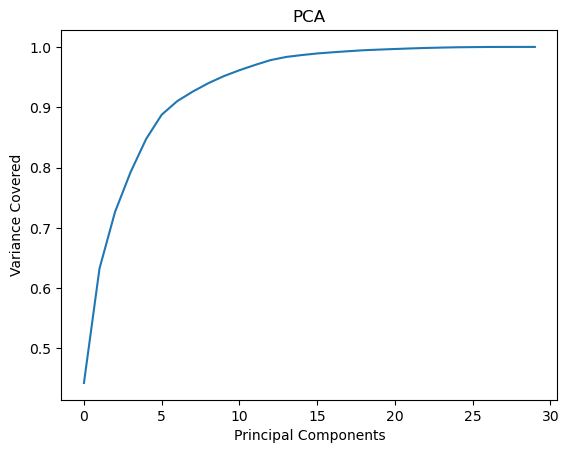

In [69]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [70]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(x_scaled)
prici_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
prici_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398406,-0.157107,-0.877402,0.262951,-0.859019,0.103391
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711908,1.106995,0.813119,0.157926,-0.943531
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097372,0.024054,0.454276,-0.605599,0.124392,-0.410630
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059563,-1.405458,-1.116975,-1.151507,1.011325,-0.933278
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636377,-0.263802,0.377704,0.651358,-0.110517,0.387949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596129,-0.035472,0.987920,0.256989,-0.062647,0.123345,-0.051726
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105213,-0.108632,0.244805,0.222756,-0.192639
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341886,0.393913,0.520877,-0.840510,0.096474,0.157417
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542033,-0.089296,-0.178625,-0.697467,1.225197


In [71]:
df1['diagnosis']=df1['diagnosis'].replace({'M':1,'B':0})
y=df1['diagnosis']    

In [72]:
x_train,x_test,y_train,y_test= train_test_split(prici_comp,y,test_size=0.25,random_state=335)

In [90]:
# Metrics
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n-------Train Result--------')
        
        print(f'Accurancy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
        pred=clf.predict(x_test)
        
          
        print('\n-------Train Result--------')
        
        print(f'Accurancy score:{accuracy_score(y_test,pred)*100:.2f}%')
        
        print(classification_report(y_test,pred,digits=2))
        
        

NameError: name 'clf' is not defined

In [89]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


-------Train Result--------
Accurancy score:98.12%

-------Train Result--------
Accurancy score:97.20%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        97
           1       0.92      1.00      0.96        46

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143



In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [92]:
gbdt.fit(x_train,y_train)
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


-------Train Result--------
Accurancy score:100.00%

-------Train Result--------
Accurancy score:97.90%
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        97
           1       0.94      1.00      0.97        46

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [93]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [94]:
rf.fit(x_train,y_train)
print_score(rf,x_train,x_test,y_train,y_test,train=True)
print_score(rf,x_train,x_test,y_train,y_test,train=False)


-------Train Result--------
Accurancy score:100.00%

-------Train Result--------
Accurancy score:97.20%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.94      0.98      0.96        46

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# Hyper parameter Tunning

In [95]:
from sklearn.model_selection import  GridSearchCV

In [96]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [97]:
gridsearch=GridSearchCV(svc,param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 5, 'gamma': 0.02}

In [100]:
svc=SVC(C= 5, gamma=0.02)
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


-------Train Result--------
Accurancy score:98.59%

-------Train Result--------
Accurancy score:98.60%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        97
           1       0.96      1.00      0.98        46

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.98       143
weighted avg       0.99      0.99      0.99       143



#Creating Pipline 

# Creating Pipeline

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [104]:
x=df1.drop(['diagnosis'],axis=1,)
y=df1.diagnosis

x_train,x_test,y_train,y_test= train_test_split(prici_comp,y,test_size=0.25,random_state=335)

In [110]:
pipe=Pipeline([('Sacler',StandardScaler()),
              ('PCA',PCA(n_components=13)),
              ('SVM',SVC(C=7,gamma=0.01))])

In [111]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Sacler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=7, gamma=0.01))])

In [ ]:
y_p